In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the data 
data = pd.read_csv('/content/drive/MyDrive/Train (1).csv')
#checking the first 5 rows of the dataframe
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.shape

(8523, 12)

In [ ]:
# getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
data['Item_Weight'].mean()

12.857645184135976

In [ ]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [ ]:
data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [ ]:
mode_of_Outlet_size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [ ]:
miss_values = data['Outlet_Size'].isnull()

In [ ]:
data.loc[miss_values, 'Outlet_Size'] = data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [ ]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
encoder = LabelEncoder()

In [ ]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])

data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])

data['Item_Type'] = encoder.fit_transform(data['Item_Type'])

data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])

data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])

data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])

data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
#Let's have all the features in X & target in Y
X = data.drop(columns='Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

In [ ]:
X.shape

(8523, 11)

In [ ]:
y.shape

(8523,)

In [ ]:
x_train = X.iloc[0:6822] # 80%
x_test = X.iloc[6822:] # 20%
y_train = y.iloc[0:6822] # 80%
y_test = y.iloc[6822:] # 20%
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6822, 11)
(1701, 11)
(6822,)
(1701,)


In [ ]:
x_train.head(100)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300000,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920000,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500000,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200000,2,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930000,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
95,970,12.857645,1,0.009715,5,120.0414,4,1985,2,0,0
96,382,12.150000,1,0.131384,5,246.0460,9,1999,1,0,1
97,231,8.750000,2,0.074613,6,187.4556,6,2004,2,1,1
98,1442,12.857645,1,0.028460,9,149.9708,5,1985,1,2,3


In [ ]:
import numpy as np

x_train = np.asarray(x_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
mea = np.mean(x_train,axis = 0)
std = np.std(x_train,axis = 0)
x_train = (x_train-mea)/std
x_test = (x_test-mea)/std

In [ ]:
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential

LSTM starts

In [ ]:
def get_model(params, input_shape):
	model = Sequential()
	model.add(LSTM(units=params["lstm_units"], return_sequences=True, input_shape=(input_shape, 1)))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=False))
	model.add(Dropout(rate=params["dropout"]))

	model.add(Dense(1,activation = "linear"))

	model.compile(loss=params["loss"],
              	optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.003),
              	metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

	return model

In [ ]:
params = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
	"dropout": 0.2,
	"lstm_units": 138,
	"epochs": 100,
	"batch_size": 128,
	"es_patience" : 10
}

model = get_model(params=params, input_shape=x_train.shape[1])

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                           	mode='min', 
patience=params["es_patience"])

In [ ]:
history = model.fit(
	x_train,
	y_train,
	validation_data=(x_test, y_test),
	epochs=params["epochs"],
	batch_size=params["batch_size"],
	verbose=1, callbacks=[es_callback]
)

Epoch 1/100
54/54 [==============================] - 14s 35ms/step - loss: 7567625.5000 - root_mean_squared_error: 2750.9316 - mean_absolute_error: 2162.0112 - val_loss: 7496246.0000 - val_root_mean_squared_error: 2737.9272 - val_mean_absolute_error: 2123.9185
Epoch 2/100
54/54 [==============================] - 1s 11ms/step - loss: 7461084.5000 - root_mean_squared_error: 2731.4985 - mean_absolute_error: 2137.1990 - val_loss: 7400083.0000 - val_root_mean_squared_error: 2720.3093 - val_mean_absolute_error: 2101.3938
Epoch 3/100
54/54 [==============================] - 1s 11ms/step - loss: 7365801.5000 - root_mean_squared_error: 2714.0010 - mean_absolute_error: 2115.0681 - val_loss: 7307464.0000 - val_root_mean_squared_error: 2703.2322 - val_mean_absolute_error: 2079.6550
Epoch 4/100
54/54 [==============================] - 1s 10ms/step - loss: 7272813.0000 - root_mean_squared_error: 2696.8152 - mean_absolute_error: 2093.4712 - val_loss: 7216774.0000 - val_root_mean_squared_error: 2686.4

In [ ]:
print(history.history)

{'loss': [7567625.5, 7461084.5, 7365801.5, 7272813.0, 7182021.0, 7093124.0, 7004472.0, 6918388.5, 6833481.5, 6749697.0, 6668247.0, 6587106.5, 6506964.5, 6429792.0, 6352345.0, 6275781.5, 6201349.0, 6129362.0, 6054997.0, 5983318.0, 5917682.5, 5847399.5, 5780178.5, 5713486.0, 5648256.5, 5581929.5, 5519907.5, 5458354.0, 5395310.5, 5332729.5, 5270814.0, 5214025.0, 5152739.0, 5098452.0, 5040648.5, 4984979.0, 4929447.5, 4879410.0, 4827123.5, 4773434.0, 4723318.0, 4674466.5, 4624636.0, 4577799.5, 4532189.5, 4483917.0, 4440536.5, 4395558.5, 4353823.5, 4312444.5, 4265569.5, 4228312.0, 4186385.25, 4144873.0, 4109363.75, 4071135.25, 4031855.75, 4001007.0, 3961485.25, 3930554.25, 3896248.0, 3861596.5, 3830952.75, 3797907.25, 3768120.0, 3739937.5, 3708001.75, 3680785.75, 3654524.75, 3626725.5, 3600892.5, 3571189.0, 3543076.75, 3521135.25, 3493739.0, 3473868.25, 3447752.5, 3432869.75, 3405355.0, 3384938.0, 3368816.25, 3341063.25, 3324342.5, 3302242.75, 3283869.5, 3272658.75, 3253059.25, 3234585.75, 3

In [ ]:
root_mean_squared_error = history.history['root_mean_squared_error']
mean_absolute_error = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_root_mean_squared_error = history.history['val_root_mean_squared_error']
val_mean_absolute_error = history.history['val_mean_absolute_error']

Epoch 1/100
214/214 [==============================] - 2s 10ms/step - loss: 3051331.7500 - root_mean_squared_error: 1746.8062 - mean_absolute_error: 1310.3660 - val_loss: 3103920.0000 - val_root_mean_squared_error: 1761.7946 - val_mean_absolute_error: 1322.0319
Epoch 2/100
214/214 [==============================] - 3s 14ms/step - loss: 3020461.2500 - root_mean_squared_error: 1737.9474 - mean_absolute_error: 1312.9906 - val_loss: 3076046.2500 - val_root_mean_squared_error: 1753.8661 - val_mean_absolute_error: 1323.1147
Epoch 3/100
214/214 [==============================] - 3s 13ms/step - loss: 2993325.7500 - root_mean_squared_error: 1730.1230 - mean_absolute_error: 1312.4480 - val_loss: 3053297.0000 - val_root_mean_squared_error: 1747.3685 - val_mean_absolute_error: 1325.2715
Epoch 4/100
214/214 [==============================] - 2s 11ms/step - loss: 2970565.2500 - root_mean_squared_error: 1723.5327 - mean_absolute_error: 1314.9553 - val_loss: 3035234.5000 - val_root_mean_squared_error:

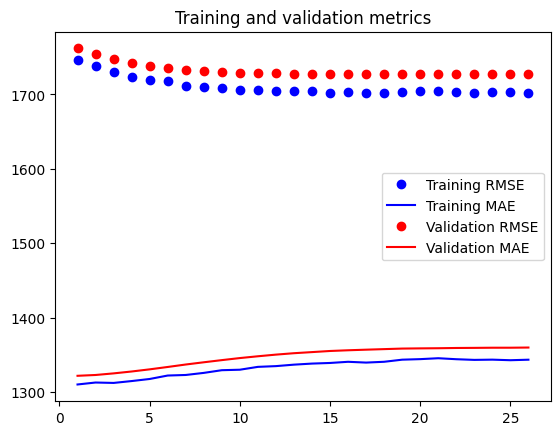

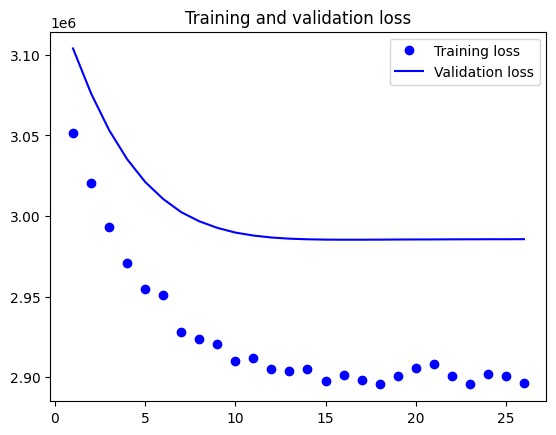

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[es_callback], epochs=100, batch_size=32)

val_loss = history.history['val_loss']
val_rmse = history.history['val_root_mean_squared_error']
val_mae = history.history['val_mean_absolute_error']
loss = history.history['loss']
rmse = history.history['root_mean_squared_error']
mae = history.history['mean_absolute_error']

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, rmse, 'bo', label='Training RMSE')
plt.plot(epochs, mae, 'b', label='Training MAE')
plt.plot(epochs, val_rmse, 'ro', label='Validation RMSE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and validation metrics')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


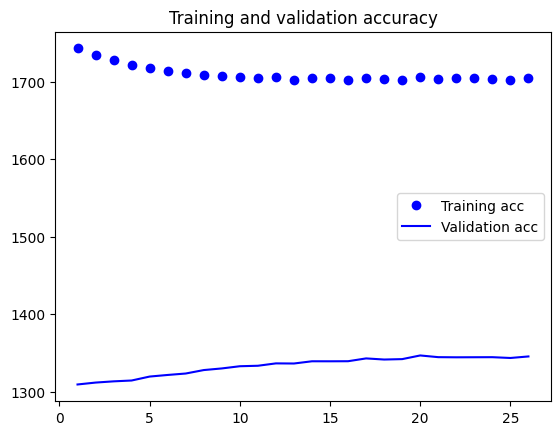

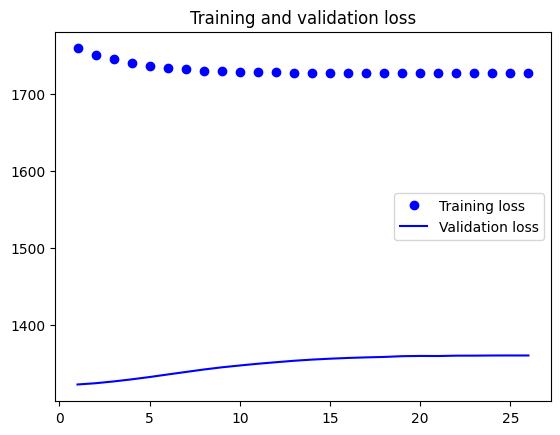

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, root_mean_squared_error, 'bo', label='Training acc')
plt.plot(epochs, mean_absolute_error, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, val_root_mean_squared_error, 'bo', label='Training loss')
plt.plot(epochs, val_mean_absolute_error, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

GRU

In [ ]:
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.layers import GRU
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential

In [ ]:
def get_model(params, input_shape):
	model = Sequential()
	model.add(GRU(units=params["gru_units"], return_sequences=True, input_shape=(input_shape, 1)))
	model.add(Dropout(rate=params["dropout"]))

	model.add(GRU(units=params["gru_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(GRU(units=params["gru_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(GRU(units=params["gru_units"], return_sequences=False))
	model.add(Dropout(rate=params["dropout"]))

	model.add(Dense(1,activation = "linear"))

	model.compile(loss=params["loss"],
              	optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.003),
              	metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

	return model

In [ ]:
params = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
	"dropout": 0.2,
	"gru_units": 138,
	"epochs": 100,
	"batch_size": 128,
	"es_patience" : 10
}

model = get_model(params=params, input_shape=x_train.shape[1])

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                           	mode='min', 
patience=params["es_patience"])

In [ ]:
history = model.fit(
	x_train,
	y_train,
	validation_data=(x_test, y_test),
	epochs=params["epochs"],
	batch_size=params["batch_size"],
	verbose=1, callbacks=[es_callback]
)

Epoch 1/100
54/54 [==============================] - 8s 30ms/step - loss: 7572720.0000 - root_mean_squared_error: 2751.8574 - mean_absolute_error: 2163.1714 - val_loss: 7502614.5000 - val_root_mean_squared_error: 2739.0901 - val_mean_absolute_error: 2125.4124
Epoch 2/100
54/54 [==============================] - 1s 10ms/step - loss: 7467352.5000 - root_mean_squared_error: 2732.6458 - mean_absolute_error: 2138.7759 - val_loss: 7405515.0000 - val_root_mean_squared_error: 2721.3076 - val_mean_absolute_error: 2102.6682
Epoch 3/100
54/54 [==============================] - 1s 10ms/step - loss: 7369513.5000 - root_mean_squared_error: 2714.6848 - mean_absolute_error: 2116.0867 - val_loss: 7310595.5000 - val_root_mean_squared_error: 2703.8113 - val_mean_absolute_error: 2080.3865
Epoch 4/100
54/54 [==============================] - 1s 11ms/step - loss: 7274737.5000 - root_mean_squared_error: 2697.1721 - mean_absolute_error: 2093.9133 - val_loss: 7218012.5000 - val_root_mean_squared_error: 2686.63

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[es_callback], epochs=100, batch_size=32)


Epoch 1/100
214/214 [==============================] - 2s 9ms/step - loss: 3036982.7500 - root_mean_squared_error: 1742.6941 - mean_absolute_error: 1309.1838 - val_loss: 3094697.5000 - val_root_mean_squared_error: 1759.1752 - val_mean_absolute_error: 1322.1995
Epoch 2/100
214/214 [==============================] - 2s 9ms/step - loss: 3009648.0000 - root_mean_squared_error: 1734.8337 - mean_absolute_error: 1311.6404 - val_loss: 3067170.2500 - val_root_mean_squared_error: 1751.3339 - val_mean_absolute_error: 1323.8237
Epoch 3/100
214/214 [==============================] - 2s 9ms/step - loss: 2985092.7500 - root_mean_squared_error: 1727.7421 - mean_absolute_error: 1313.2196 - val_loss: 3046288.2500 - val_root_mean_squared_error: 1745.3619 - val_mean_absolute_error: 1326.1512
Epoch 4/100
214/214 [==============================] - 2s 10ms/step - loss: 2962593.0000 - root_mean_squared_error: 1721.2184 - mean_absolute_error: 1314.3103 - val_loss: 3029467.5000 - val_root_mean_squared_error: 17

In [ ]:
root_mean_squared_error = history.history['root_mean_squared_error']
mean_absolute_error = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_root_mean_squared_error = history.history['val_root_mean_squared_error']
val_mean_absolute_error = history.history['val_mean_absolute_error']

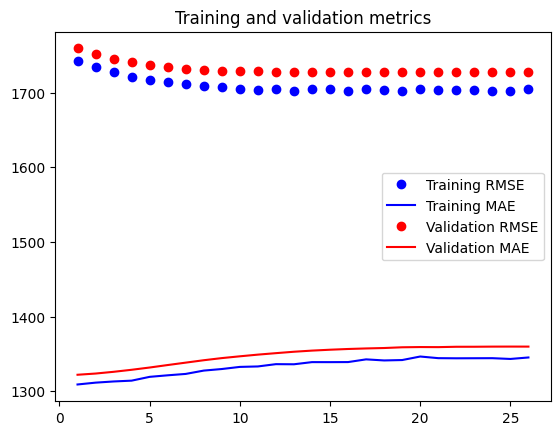

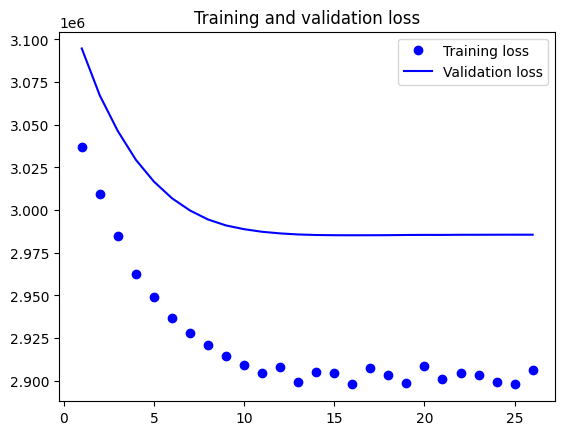

In [ ]:
import matplotlib.pyplot as plt

# history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[es_callback], epochs=100, batch_size=32)

val_loss = history.history['val_loss']
val_rmse = history.history['val_root_mean_squared_error']
val_mae = history.history['val_mean_absolute_error']
loss = history.history['loss']
rmse = history.history['root_mean_squared_error']
mae = history.history['mean_absolute_error']

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, rmse, 'bo', label='Training RMSE')
plt.plot(epochs, mae, 'b', label='Training MAE')
plt.plot(epochs, val_rmse, 'ro', label='Validation RMSE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and validation metrics')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


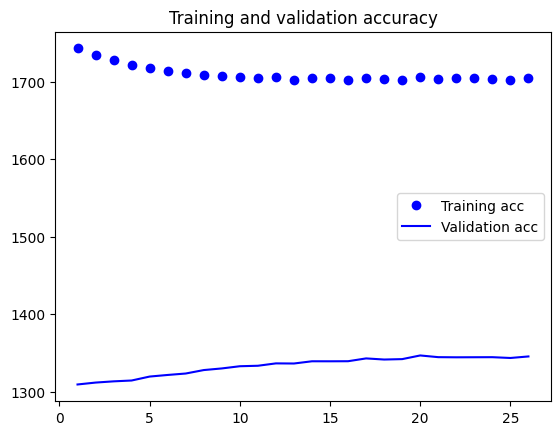

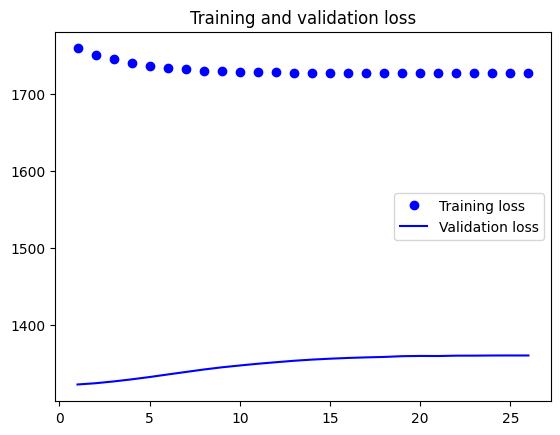

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, root_mean_squared_error, 'bo', label='Training acc')
plt.plot(epochs, mean_absolute_error, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, val_root_mean_squared_error, 'bo', label='Training loss')
plt.plot(epochs, val_mean_absolute_error, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

RNN

In [ ]:
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential

In [ ]:
def get_model(params, input_shape):
	model = Sequential()
	model.add(SimpleRNN(units=params["lstm_units"], return_sequences=True, input_shape=(input_shape, 1)))
	model.add(Dropout(rate=params["dropout"]))

	model.add(SimpleRNN(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(SimpleRNN(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(SimpleRNN(units=params["lstm_units"], return_sequences=False))
	model.add(Dropout(rate=params["dropout"]))

	model.add(Dense(1,activation = "linear"))

	model.compile(loss=params["loss"],
              	optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.003),
              	metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

	return model

In [ ]:
params = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
	"dropout": 0.2,
	"lstm_units": 138,
	"epochs": 100,
	"batch_size": 128,
	"es_patience" : 10
}

model = get_model(params=params, input_shape=x_train.shape[1])

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                           	mode='min', 
patience=params["es_patience"])

In [ ]:
history = model.fit(
	x_train,
	y_train,
	validation_data=(x_test, y_test),
	epochs=params["epochs"],
	batch_size=params["batch_size"],
	verbose=1, callbacks=[es_callback]
)

In [ ]:
root_mean_squared_error = history.history['root_mean_squared_error']
mean_absolute_error = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_root_mean_squared_error = history.history['val_root_mean_squared_error']
val_mean_absolute_error = history.history['val_mean_absolute_error']

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, root_mean_squared_error, 'bo', label='Training acc')
plt.plot(epochs, mean_absolute_error, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, val_root_mean_squared_error, 'bo', label='Training loss')
plt.plot(epochs, val_mean_absolute_error, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

CNN

In [ ]:
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential

In [ ]:
def CNN_model(params):
  
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3,
                        strides=1, padding="causal",
                        activation="relu",
                        input_shape=[None, 1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(filters=32, kernel_size=32,
                        strides=1, padding="causal",
                        activation="relu"),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(1,activation = "linear")])
    #tf.keras.layers.Lambda(lambda x: x * 200)

  model.compile(loss=params["loss"],
              optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.003),
              metrics=[RootMeanSquaredError(), MeanAbsoluteError()])
  
  return model


params = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
	"dropout": 0.2,
	"epochs": 100,
	"batch_size": 128,
	"es_patience" : 10
}

model = CNN_model(params)

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                           	mode='min', 
patience=params["es_patience"])


history_cnn = model.fit(
	x_train,
	y_train,
	validation_data=(x_test, y_test),
	epochs=params["epochs"],
	batch_size=params["batch_size"],
	verbose=1, callbacks=[es_callback]
)

In [ ]:
root_mean_squared_error = history_cnn.history['root_mean_squared_error']
mean_absolute_error = history_cnn.history['mean_absolute_error']
val_loss = history_cnn.history['val_loss']
val_root_mean_squared_error = history_cnn.history['val_root_mean_squared_error']
val_mean_absolute_error = history_cnn.history['val_mean_absolute_error']

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, root_mean_squared_error, 'bo', label='Training acc')
plt.plot(epochs, mean_absolute_error, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, val_root_mean_squared_error, 'bo', label='Training loss')
plt.plot(epochs, val_mean_absolute_error, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(val_root_mean_squared_error) + 1)
loss = val_root_mean_squared_error

plt.plot(epochs, loss, 'bo', label='Validation RMSE')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Validation RMSE')
plt.legend()

plt.show()
